In [97]:
from sklearn import svm , metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cross_validation

In [98]:
glass = pd.read_csv('glass.csv')

In [99]:
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [100]:
glass.shape

(214, 10)

In [101]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [102]:
import seaborn as sns
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 15 , 15 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

In [103]:
plot_correlation_map(glass)

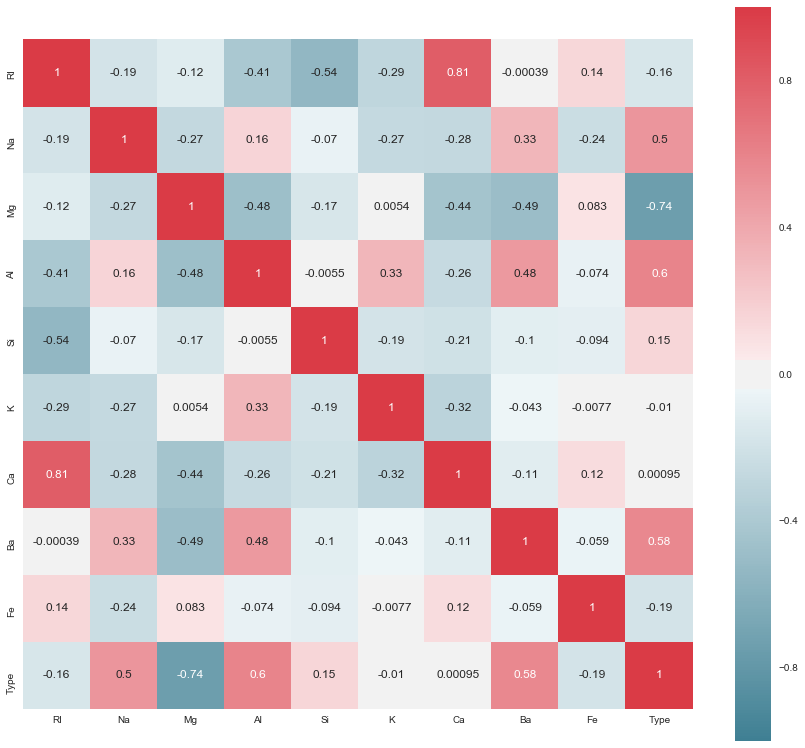

In [104]:
plt.show()

In [92]:
# Ca can be deleted because it does not affect the type of glass

In [105]:
glass.drop(['Ca'] , 1 ,inplace=True)

In [106]:
target = glass.Type
glass.drop(['Type'] , 1 ,inplace=True)

In [167]:
xtrain , xtest , ytrain , ytest = cross_validation.train_test_split(glass , target , test_size = 0.2)

In [168]:
clf = svm.SVC(kernel='linear' , C = 5)
clf.fit(xtrain , ytrain)
clf.score(xtest , ytest)

0.65116279069767447

In [169]:
clf1 = svm.SVC(kernel='rbf' , C = 5 ,gamma = 0.05)
clf1.fit(xtrain , ytrain)
clf1.score(xtest , ytest)

0.62790697674418605

In [171]:
from sklearn.feature_selection import RFE
selector = RFE(clf ,7, step=1)
selector.fit(xtrain, ytrain)
print(selector.support_ )
print(glass.columns)
selector.score(xtest,ytest)

[False  True  True  True  True  True  True  True]
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe'], dtype='object')


0.65116279069767447

In [163]:
selector.n_features_

7

In [164]:
selector.ranking_

array([2, 1, 1, 1, 1, 1, 1, 1])